In [95]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
onlyfiles = [f for f in listdir('/home/veniamin/Desktop/test_plate_standart')
if isfile(join('/home/veniamin/Desktop/test_plate_standart', f))]
onlyfiles

['Walking_Perpendicular_8.pcap',
 'Nothing_5.pcap',
 'Hand_circle_4.pcap',
 'Smoking_8.pcap',
 'Walking_Perpendicular_14.pcap',
 'Falldown_1.pcap',
 'Nothing_6.pcap',
 'Walking_Perpendicular_9.pcap',
 'Nothing_12.pcap',
 'Nothing_14.pcap',
 'Walking_along_3.pcap',
 'Nothing_1.pcap',
 'Walking_Perpendicular_2.pcap',
 'Smoking_7.pcap',
 'Falldown_6.pcap',
 'Smoking_3.pcap',
 'Hand_move_up_13.pcap',
 'Hand_move_up_2.pcap',
 'Walking_along_11.pcap',
 'Nothing_4.pcap',
 'Hand_circle_1.pcap',
 'Hand_move_up_6.pcap',
 'Hand_circle_2.pcap',
 'Hand_move_up_3.pcap',
 'Falldown_10.pcap',
 'Walking_Perpendicular_4.pcap',
 'Walking_along_8.pcap',
 'Walking_along_15.pcap',
 'Hand_move_up_14.pcap',
 'Smoking_14.pcap',
 'Hand_circle_9.pcap',
 'Hand_move_up_11.pcap',
 'Walking_Perpendicular_13.pcap',
 'Hand_move_up_7.pcap',
 'Smoking_13.pcap',
 'Walking_along_10.pcap',
 'Smoking_10.pcap',
 'Falldown_2.pcap',
 'Walking_along_9.pcap',
 'Walking_along_2.pcap',
 'Hand_circle_13.pcap',
 'Falldown_5.pcap',
 

In [96]:
from CSIKit.reader import get_reader
from CSIKit.util import csitools
frame_array = []
for file in onlyfiles:
    filename = "/home/veniamin/Desktop/test_plate_standart/{}".format(file)
    my_reader = get_reader(filename)
    csi_data = my_reader.read_file(filename, scaled=True)
    csi_phase, no_frames, no_subcarriers = csitools.get_CSI(csi_data) #, metric="phase")
    csi_amplitude, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")
    #print(csi_amplitude)
    frame_array.append(no_frames)
    df = pd.DataFrame(csi_amplitude.reshape(-1, 256))
    df.to_csv(path_or_buf=filename,header=False,index=False)


<AxesSubplot:>

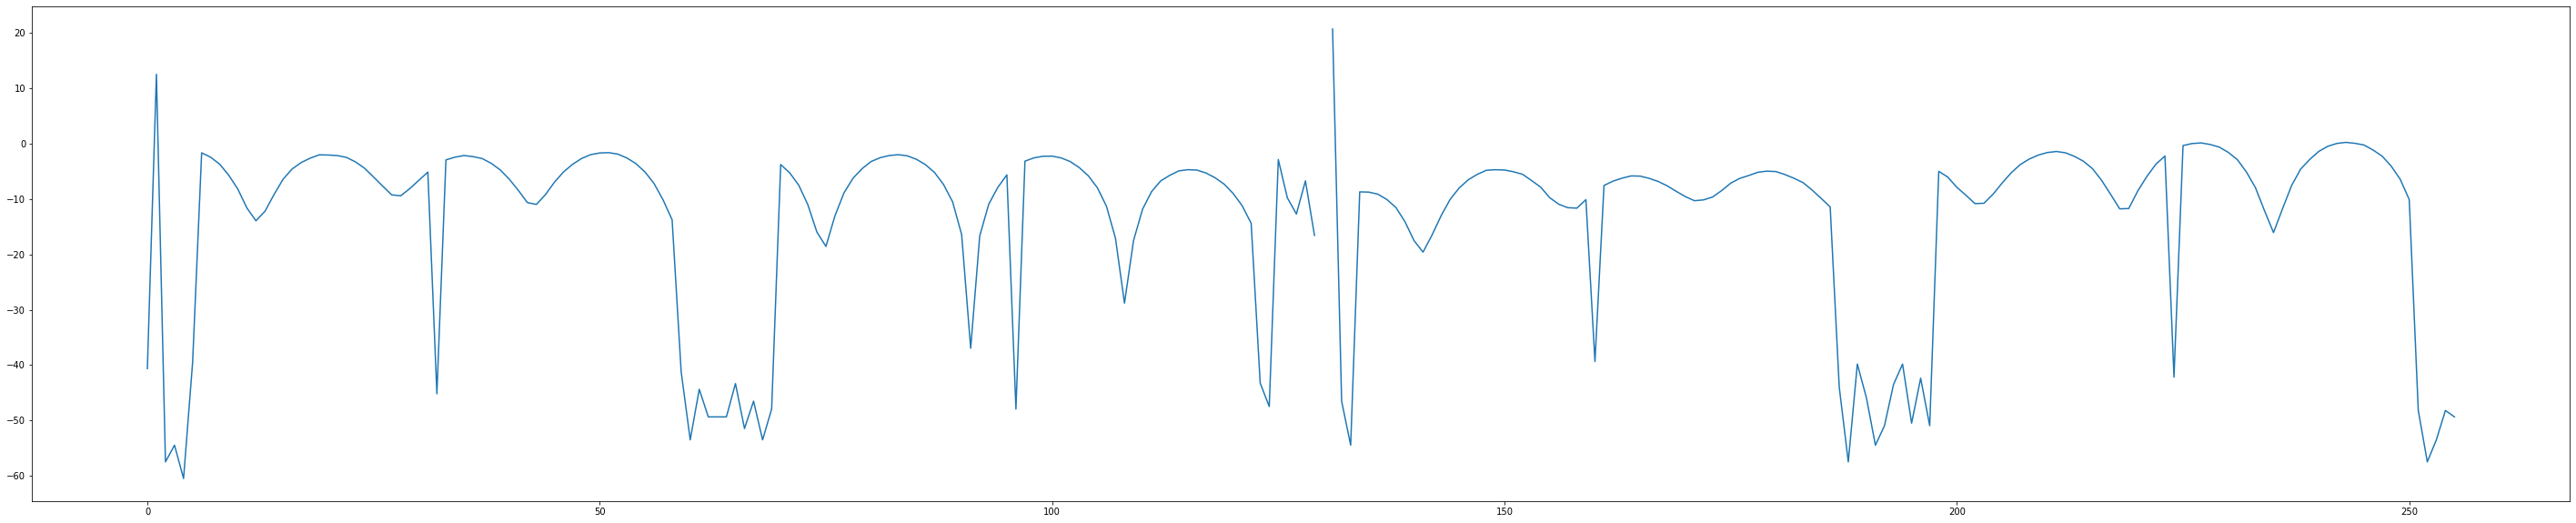

In [97]:
from numpy import inf
import matplotlib.pyplot as plt
df.replace(-inf, df.mean())
pd.DataFrame(df.iloc[0]).plot.line(figsize=
[50,10], legend=False)

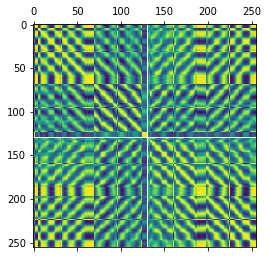

In [98]:
# my_reader = get_reader("/home/veniamin/Desktop/test_plate_standart/Falldown_1.pcap")
# csi_data = my_reader.read_file(filename, scaled=True)
# csi_phase, no_frames, no_subcarriers = csitools.get_CSI(csi_data) #, metric="phase")
# csi_amplitude, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")
# frame_array.append(no_frames)
# df1 = pd.DataFrame(csi_amplitude.reshape(-1, 256))
# plt.matshow(df1.corr())
# plt.show()
plt.matshow(df.corr())
plt.show()

In [99]:
from CSIKit.filters.passband import lowpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel
from CSIKit.tools.batch_graph import BatchGraph

my_reader = get_reader("/home/veniamin/Desktop/test_plate_standart/Falldown_1.pcap")
csi_data = my_reader.read_file("/home/veniamin/Desktop/test_plate_standart/Falldown_1.pcap", scaled=True)
csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data)
BatchGraph.heatmap(csi_matrix)

MemoryError: 